# Geometric interpretation of PCA

In [31]:
import numpy as np
import matplotlib.pyplot as plt

Define the unit vector
$\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.

In [32]:
theta = np.pi / 6

v1 = np.array([np.cos(theta), np.sin(theta)])
v2 = np.array([-np.sin(theta), np.cos(theta)])

Define the point $\mathbf{b} = \begin{pmatrix} 20 \\ 30\end{pmatrix}$

In [33]:
b = np.array([20, 30])

Generate $n = 1000$ points $\mathbf{x}_i$ according to the formula:

$\mathbf{x}_i = \mathbf{b} + r_{1,i} \rho_1 \mathbf{v}_1 + r_{2,i} \rho_2 \mathbf{v}_2$

where $\rho_1 = 12$, $\rho_2 = 3$ and the $r_{i,j}$ are real numbers independently generated according to a normal distribution. 

In [34]:
n_points = 1000
rho_1, rho_2 = 12, 3
seeds = np.random.randn(2, n_points)
seeds.shape


(2, 1000)

In [35]:
X = b[:, None] + rho_1 * np.outer(v1, seeds[0, :]) + rho_2 * np.outer(v2, seeds[1, :])
X.shape

(2, 1000)

Plot the generated numbers in a plane, showing the directions $\mathbf{v}_1$ and $\mathbf{v}_2$, rescaled by $\rho_1$ and $\rho_2$, respectivaly.

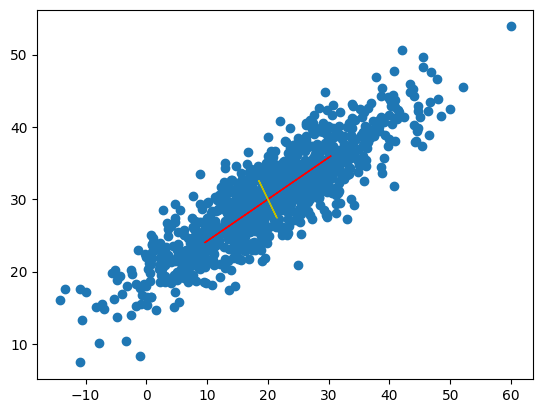

In [36]:
# plot points
plt.scatter(X[0, :], X[1, :])

# show vectors v1 and v2
plt.arrow(b[0] - v1[0] * rho_1, b[1] - v1[1] * rho_1, 2 * v1[0] * rho_1, 2* v1[1] * rho_1, color='r')
plt.arrow(b[0] - v2[0] * rho_2, b[1] - v2[1] * rho_2, 2 * v2[0] * rho_2, 2* v2[1] * rho_2, color='y')


Perform PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$

In [37]:
miu = np.mean(X, axis=1)
X_centered = X - miu[:, None]
U, s, VT = np.linalg.svd(X_centered, full_matrices=False)
U.shape, s.shape, VT.shape

((2, 2), (2,), (2, 1000))

Plot the first two singular vectors, rescaled by the root of the sample variance:

${\sqrt{\frac{\sigma_1^2}{(n - 1)}}}{\mathbf{u}_1}, {\sqrt{\frac{\sigma_2^2}{(n - 1)}}}{\mathbf{u}_2}$

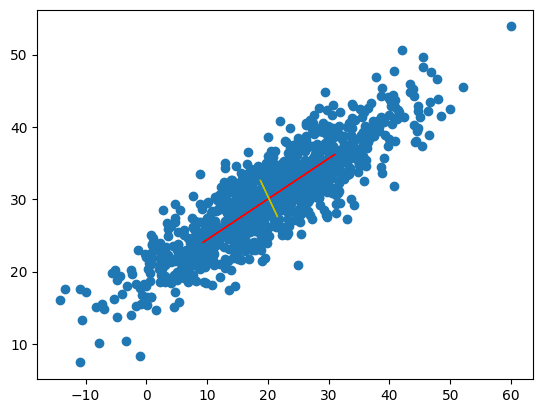

In [38]:
u1 = U[:, 0]
u2 = U[:, 1]

r = s / np.sqrt(n_points - 1)

plt.scatter(X[0, :], X[1, :])
plt.arrow(miu[0] - u1[0] * r[0], miu[1] - u1[1] * r[0], 2 * u1[0] * r[0], 2 * u1[1] * r[0], color='r')
plt.arrow(miu[0] - u2[0] * r[1], miu[1] - u2[1] * r[1], 2 * u2[0] * r[1], 2 * u2[1] * r[1], color='y')

In [39]:
u1, u2

(array([-0.87206246, -0.48939458]), array([-0.48939458,  0.87206246]))

In [40]:
v1, v2

(array([0.8660254, 0.5      ]), array([-0.5      ,  0.8660254]))

Compute the principal components of the data:

$\Phi = U^T \overline{X}$

In [43]:
phi = np.matmul(U.transpose(), X - miu[:, None])

Make a scatterplot of the two first principal components ($\phi_1$, $\phi_2$)

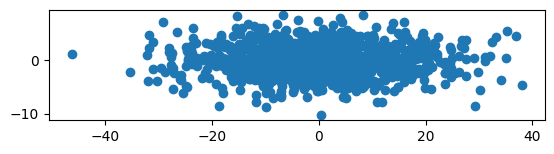

In [44]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(phi[0, :], phi[1, :])
ax.set_aspect('equal')